<a href="https://colab.research.google.com/github/Anudeep003/codtech-week2/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-fine-food-reviews


In [4]:
# Load the data
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

# Remove rows with score = 3 (neutral)
data = data[data['Score'] != 3]

# Create a new 'Recommond' column: 1 = positive (score > 3), 0 = negative (score < 3)
data['Recommond'] = (data['Score'] > 3).astype(int)

# Now you can use value_counts on Recommond
print(data['Recommond'].value_counts())

Recommond
1    443777
0     82037
Name: count, dtype: int64


In [5]:
data.dropna(inplace=True)

In [6]:
data = data.sample(50000)  # or smaller

In [7]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Recommond
369210,369211,B001D0DMME,ATF77OLT5BRCU,Pat,1,1,5,1316822400,Best bar!!,Best tasting bar ever! Perfect for a quick sn...,1
366220,366221,B001D9JC0G,A2WY4X18J0RUCN,K. Todd,3,3,5,1196294400,I will never use anythign else for my pets . . .,This food is amazing. When I got my dog she w...,1
530948,530949,B004BGFEXW,AO54SER120YRS,helenwitless,1,1,2,1292716800,maybe a little stale?,While I look forward to these lollipops every ...,0
472586,472587,B005VOOL00,A3H9JSM1SUTE4O,Robin Simmons,1,3,4,1337212800,BOB MARLEY WOULD LIKE THIS I THINK,"I liked the smooth, rather mild flavor of this...",1
350605,350606,B002OL2MWM,A3U0BDXO7J1JGV,Lucky Murphy,1,1,5,1291766400,A must have for wine lovers!!!!,I'm not sure how my husband and I lived withou...,1
...,...,...,...,...,...,...,...,...,...,...,...
308745,308746,B000F3S6JY,A7ZZGV63RHRMB,Aromat Addict,0,0,5,1235865600,Love-love this product!,"If you've ever wanted that ""missing ingredient...",1
156359,156360,B001LUM1IM,A1WSK7Z08GP7B0,MNGrace,0,0,4,1313107200,Baconnaise,This stuff is pretty good but small amounts is...,1
21307,21308,B002QWP89S,A3R2E9L5HRKJD3,maddiegirl,3,3,5,1332115200,Greenies Dental Chews,My postman started giving Maddie Greenies when...,1
264621,264622,B000FZRYFY,A1K8N3VFZZJP2O,"doobie ""pat""",1,2,5,1235088000,pasta,"best low carb, sugar free pasta on the market....",1


In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=3000)

In [9]:
summary=cv.fit_transform(data['Summary']).toarray()

In [10]:

from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
Summary_train,Summary_test,Recommond_train,Recommond_test=train_test_split(summary,data['Recommond'],test_size=0.2)

In [14]:
Summary_train,Summary_test,Recommond_train,Recommond_test=train_test_split(summary,data['Recommond'],test_size=0.2)

In [15]:
model.fit(Summary_train,Recommond_train)

LogisticRegression()

In [16]:
predict = model.predict(Summary_test)

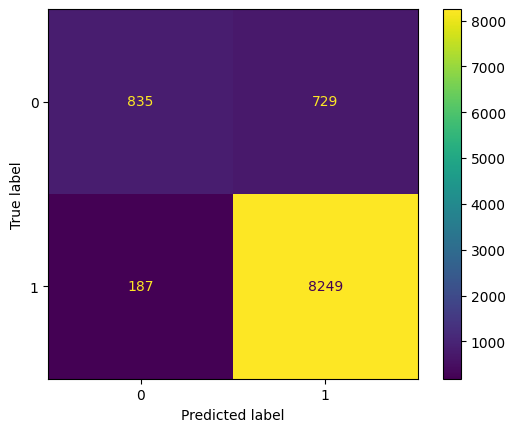

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Recommond_test,predict,labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [18]:
def sentiment_analysis(text):
  text_vectorized = cv.transform([text]).toarray()
  prediction = model.predict(text_vectorized)[0]
  outcome = 'Good Service' if prediction == 1 else 'Bad Service'
  return outcome

In [21]:
sentiment_analysis('''I recommend this product because it exceeded my expectations in both taste and quality.''')

'Good Service'

In [20]:
sentiment_analysis('''I do not recommend this product because the flavor was bland and disappointing.''')

'Bad Service'